In [87]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Testing image through convolutional layers

In [88]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
import cv2

In [89]:
path = '/kaggle/input/dogs-and-cats/cats_and_dogs_filtered/train/cats/cat.0.jpg'  
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

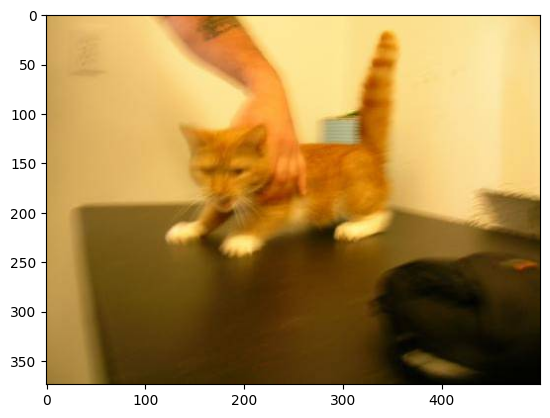

In [90]:
plt.imshow(image)

In [91]:
import tensorflow as tf

conv_layer = tf.keras.layers.Conv2D(
    filters=1,  
    kernel_size=(3, 3),  
    strides=(1, 1),      
    padding='same',      
    use_bias=True        
)

In [92]:
image.reshape(1, image.shape[0], image.shape[1], 3).shape

(1, 374, 500, 3)

In [93]:
conv_layer(image.reshape(1, image.shape[0], image.shape[1], 3))

<tf.Tensor: shape=(1, 374, 500, 1), dtype=float32, numpy=
array([[[[-182.11775   ],
         [  40.478477  ],
         [  38.8806    ],
         ...,
         [  48.937374  ],
         [  47.773155  ],
         [ 217.29272   ]],

        [[-132.61743   ],
         [  81.56959   ],
         [  80.5979    ],
         ...,
         [  98.19641   ],
         [  98.28865   ],
         [ 213.38574   ]],

        [[-132.61743   ],
         [  81.56959   ],
         [  80.5979    ],
         ...,
         [  99.81847   ],
         [  97.52045   ],
         [ 213.35129   ]],

        ...,

        [[-103.61364   ],
         [  62.772552  ],
         [  62.705482  ],
         ...,
         [   0.97041523],
         [   0.97041523],
         [   2.412176  ]],

        [[-102.983284  ],
         [  62.268528  ],
         [  61.55352   ],
         ...,
         [   0.4542694 ],
         [   0.4542694 ],
         [   1.660701  ]],

        [[ -92.23477   ],
         [  -8.920563  ],
         [  -9.4

In [94]:
kernel_weights = conv_layer.kernel.numpy()
kernel_weights

array([[[[-0.17236242],
         [ 0.28358364],
         [-0.23195232]],

        [[-0.1473769 ],
         [ 0.14072049],
         [ 0.12786287]],

        [[ 0.12222791],
         [ 0.11779487],
         [ 0.01247102]]],


       [[[ 0.33680505],
         [ 0.32620907],
         [-0.04297274]],

        [[-0.36856836],
         [ 0.05560261],
         [ 0.39923507]],

        [[-0.32564068],
         [-0.39993346],
         [-0.04310757]]],


       [[[ 0.3942433 ],
         [ 0.32784462],
         [-0.3289397 ]],

        [[ 0.34071898],
         [-0.31133217],
         [-0.28350157]],

        [[ 0.11031461],
         [-0.34564358],
         [ 0.28899634]]]], dtype=float32)

In [95]:
#Kernel phải là tensor 4 chiều
kernel_weights.shape # (H, W, C, batch size) 

(3, 3, 3, 1)

In [96]:
conv_img = conv_layer(image.reshape(1, image.shape[0], image.shape[1], 3))

In [97]:
np.array(conv_img).reshape(image.shape[0], image.shape[1])

array([[-182.11775   ,   40.478477  ,   38.8806    , ...,   48.937374  ,
          47.773155  ,  217.29272   ],
       [-132.61743   ,   81.56959   ,   80.5979    , ...,   98.19641   ,
          98.28865   ,  213.38574   ],
       [-132.61743   ,   81.56959   ,   80.5979    , ...,   99.81847   ,
          97.52045   ,  213.35129   ],
       ...,
       [-103.61364   ,   62.772552  ,   62.705482  , ...,    0.97041523,
           0.97041523,    2.412176  ],
       [-102.983284  ,   62.268528  ,   61.55352   , ...,    0.4542694 ,
           0.4542694 ,    1.660701  ],
       [ -92.23477   ,   -8.920563  ,   -9.436752  , ...,    0.31364942,
           0.31364942,    0.559178  ]], dtype=float32)

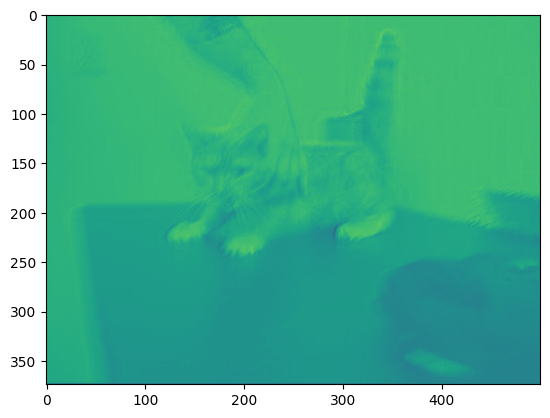

In [98]:
conv_img_reshaped = np.array(conv_img).reshape(image.shape[0], image.shape[1])
plt.imshow(conv_img_reshaped)

# Custom kernel

In [99]:
conv_layer = tf.keras.layers.Conv2D(
    filters=1,  
    kernel_size=(3, 3),  
    strides=(1, 1),      
    padding='same',      
    use_bias=True        
)

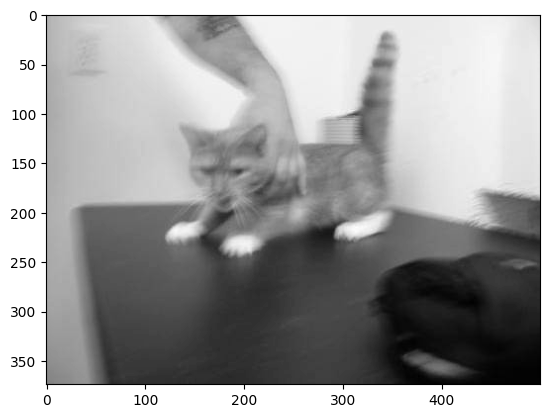

In [100]:
gray_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
plt.imshow(gray_img, cmap = 'gray')

In [101]:
gray_img.shape

(374, 500)

## Detecting vertical edges

In [102]:
custom_kernel = np.array([[[[-1]], [[0]], [[1]]],
                          [[[-2]], [[0]], [[2]]],
                          [[[-1]], [[0]], [[1]]]])

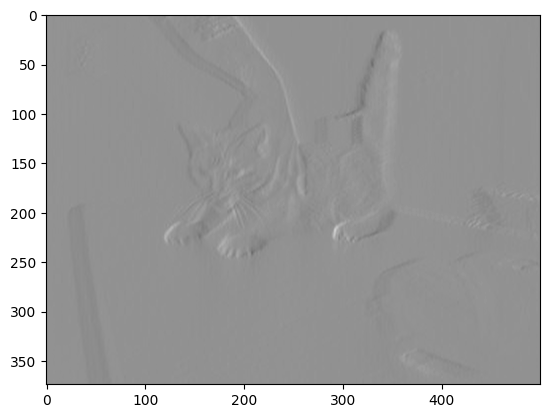

In [103]:
#phải đưa ảnh qua lớp Conv2D trước để lớp này có thông tin về số chiều của ảnh, sau đó ta mới tiến hành assign(custom_kernel) được

conv_layer(gray_img.reshape(1, gray_img.shape[0], gray_img.shape[1], 1))
conv_layer.kernel.assign(custom_kernel)
conv_img = conv_layer(gray_img.reshape(1, gray_img.shape[0], gray_img.shape[1], 1))
conv_gray_img_reshaped = np.array(conv_img).reshape(image.shape[0], image.shape[1])
plt.imshow(conv_gray_img_reshaped, cmap ='gray')

## Detecting horizontal edges

In [104]:
custom_kernel = np.array([[[[-1]], [[-1]], [[-1]]],
                          [[[0]], [[0]], [[0]]],
                          [[[1]], [[1]], [[1]]]])

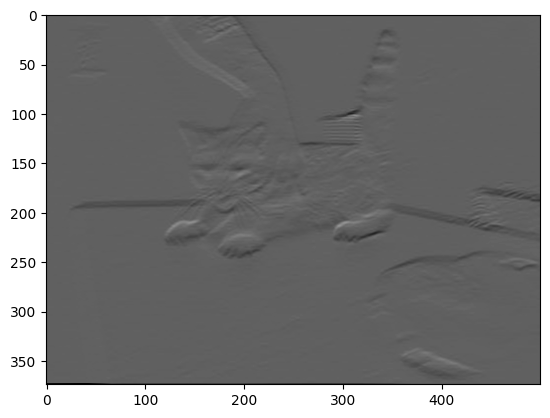

In [105]:
conv_layer(gray_img.reshape(1, gray_img.shape[0], gray_img.shape[1], 1))
conv_layer.kernel.assign(custom_kernel)
conv_img = conv_layer(gray_img.reshape(1, gray_img.shape[0], gray_img.shape[1], 1))
conv_gray_img_reshaped = np.array(conv_img).reshape(image.shape[0], image.shape[1])
plt.imshow(conv_gray_img_reshaped, cmap ='gray')

# Easy CNN

## Load dataset

In [106]:
TRAIN_PATH = '/kaggle/input/dogs-and-cats/cats_and_dogs_filtered/train/'
VAL_PATH = '/kaggle/input/dogs-and-cats/cats_and_dogs_filtered/validation/'

In [107]:
print(os.listdir(TRAIN_PATH))

for folder_name in os.listdir(TRAIN_PATH):
    print(TRAIN_PATH + folder_name)

['dogs', 'cats']
/kaggle/input/dogs-and-cats/cats_and_dogs_filtered/train/dogs
/kaggle/input/dogs-and-cats/cats_and_dogs_filtered/train/cats


In [108]:
TRAIN_CATS_PATH = os.path.join(TRAIN_PATH, 'cats')
TRAIN_DOGS_PATH = os.path.join(TRAIN_PATH, 'dogs')

In [109]:
print(TRAIN_CATS_PATH, '|', TRAIN_DOGS_PATH)

/kaggle/input/dogs-and-cats/cats_and_dogs_filtered/train/cats | /kaggle/input/dogs-and-cats/cats_and_dogs_filtered/train/dogs


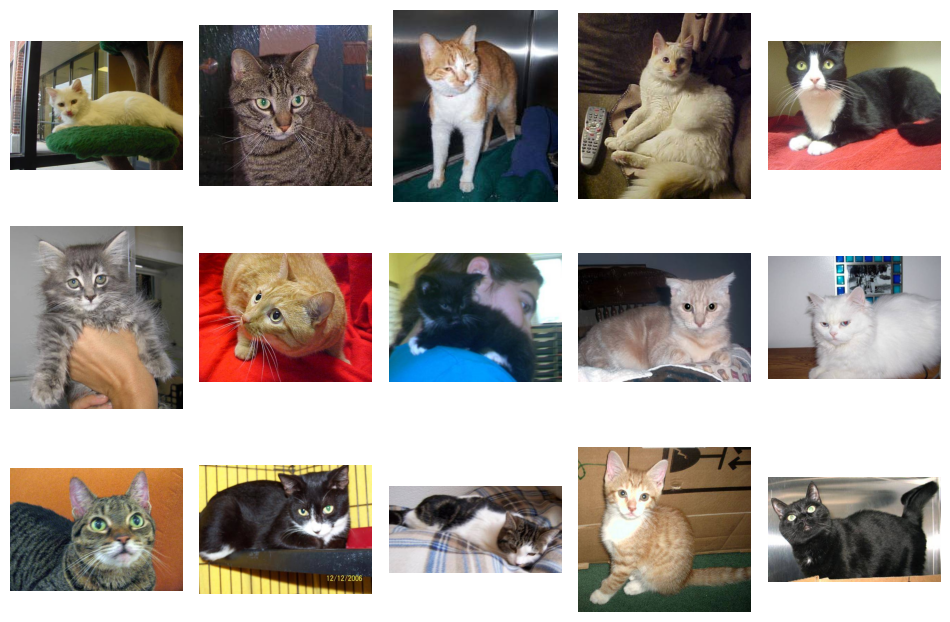

In [110]:
import matplotlib.image as mpimg

cats_file = os.listdir(TRAIN_CATS_PATH)[:25]

nrows = 3
ncols = 5

plt.figure(figsize=(12, 8))

for row in range(nrows):
    for col in range(ncols):
        index = ncols * row + col
        plt.subplot(nrows, ncols, index + 1)
        path = TRAIN_CATS_PATH + '/' + cats_file[index]
        img = mpimg.imread(path)
        plt.imshow(img)
        plt.axis('off')
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Simple model

In [111]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [112]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,605,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,703,585 (6.50 MB)

 Trainable params: 1,703,585 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

In [113]:
from tensorflow.keras.optimizers import RMSprop, Adam

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

## Image Generator for Data Preprocessing

In [114]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [115]:
# datagen = ImageDataGenerator(
#     rescale=1.0/255,          # Chuẩn hóa giá trị pixel về khoảng [0, 1]
#     rotation_range=40,        # Xoay ảnh trong khoảng (-40 đến 40 độ)
#     width_shift_range=0.2,    # Dịch ngang tối đa 20% chiều rộng
#     height_shift_range=0.2,   # Dịch dọc tối đa 20% chiều cao
#     shear_range=0.2,          # Biến dạng theo góc cắt
#     zoom_range=0.2,           # Phóng to hoặc thu nhỏ tối đa 20%
#     horizontal_flip=True,     # Lật ngang
#     fill_mode='nearest'       # Điền giá trị cho vùng thiếu (sau khi xoay/dịch)
# )

In [116]:
train_datagen = ImageDataGenerator(rescale = 1.0/255)
val_datagen  = ImageDataGenerator( rescale = 1.0/255. )

In [117]:
train_dir = TRAIN_PATH

train_generator = train_datagen.flow_from_directory(
    train_dir,               # Đường dẫn đến thư mục dữ liệu
    target_size=(150, 150),  # Kích thước ảnh đầu vào cần được resize lại trước khi feed vào mô hình (resize về 150x150)
    batch_size=32,           # Kích thước batch
    class_mode='binary'      # Phân loại nhị phân ('binary') hoặc đa lớp ('categorical')
)

Found 2000 images belonging to 2 classes.


In [118]:
val_dir = VAL_PATH

val_generator = val_datagen.flow_from_directory(
    val_dir,               # Đường dẫn đến thư mục dữ liệu
    target_size=(150, 150),  # Kích thước ảnh đầu vào cần được resize lại trước khi feed vào mô hình (resize về 150x150)
    batch_size=32,           # Kích thước batch
    class_mode='binary'      # Phân loại nhị phân ('binary') hoặc đa lớp ('categorical')
)

Found 1000 images belonging to 2 classes.


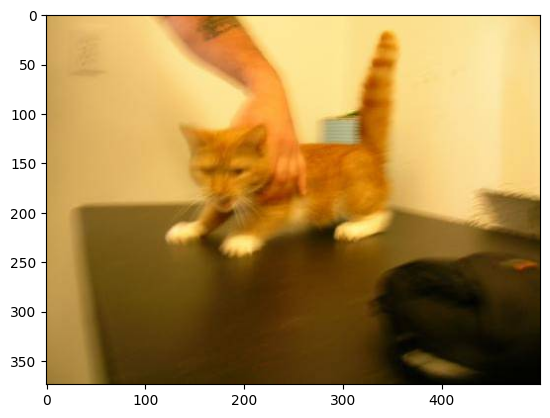

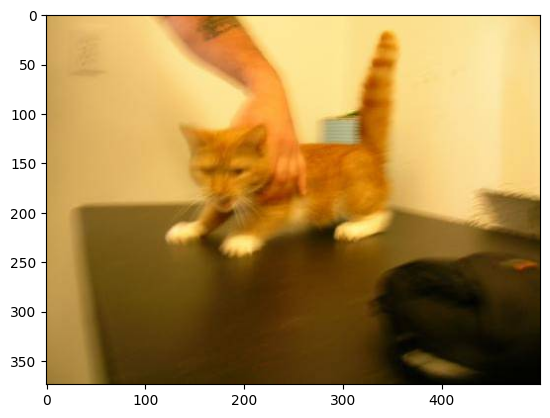

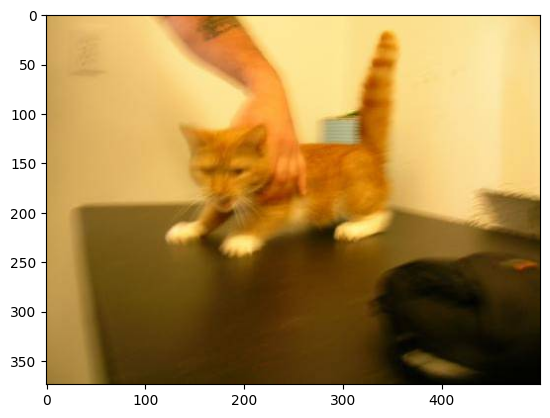

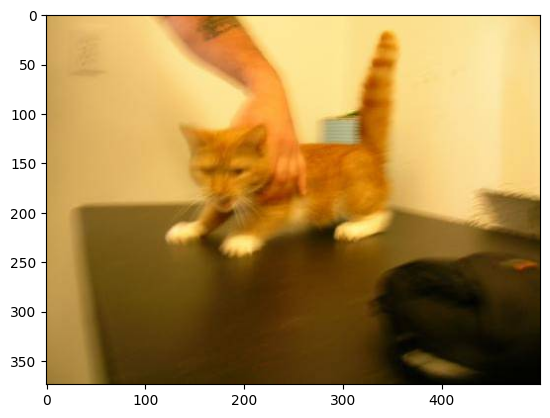

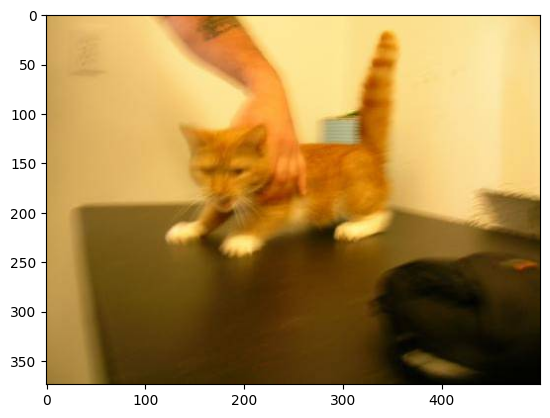

In [119]:
import matplotlib.pyplot as plt

# Chọn một ảnh từ dữ liệu
sample_image = mpimg.imread('/kaggle/input/dogs-and-cats/cats_and_dogs_filtered/train/cats/cat.0.jpg') 

# Tăng cường dữ liệu
sample_image = sample_image.reshape((1,) + sample_image.shape)  # Thêm batch dimension

# Lấy và hiển thị 5 ảnh tăng cường
i = 0
for batch in train_datagen.flow(sample_image, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0])
    i += 1
    if i >= 5:  # Hiển thị 5 ảnh
        break
plt.show()


In [126]:
import warnings
warnings.filterwarnings("ignore")

history = model.fit(
            train_generator,
            steps_per_epoch=100,
            epochs=10,
            validation_data=val_generator,
            )

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 263ms/step - accuracy: 0.7321 - loss: 0.5444 - val_accuracy: 0.6850 - val_loss: 0.5844
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 261ms/step - accuracy: 0.7693 - loss: 0.4895 - val_accuracy: 0.6950 - val_loss: 0.5745
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 256ms/step - accuracy: 0.8037 - loss: 0.4340 - val_accuracy: 0.7070 - val_loss: 0.5909
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 262ms/step - accuracy: 0.8177 - loss: 0.3943 - val_accuracy: 0.7030 - val_loss: 0.5941
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 254ms/step - accuracy: 0.8585 - loss: 0.3342 - val_accuracy: 0.7320 - val_loss: 0.6034
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 271ms/step - accuracy: 0.9010 - loss: 0.2421 - val_accuracy: 0.7370 - val_loss: 0.6568
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 259ms/step - accuracy: 0.9197 - loss: 0.2063 - val_accuracy: 0.6960 - val_loss: 0.8317
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 261ms/step - accuracy: 0.9295 - loss: 0

<Axes: >

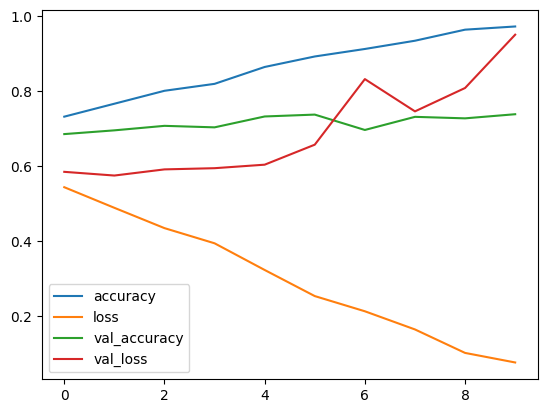

In [127]:
pd.DataFrame(history.history).plot()

(150, 150)


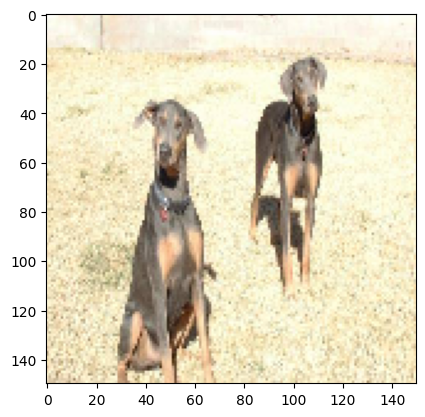

In [128]:
from keras.preprocessing import image


path = '/kaggle/input/dogs-and-cats/cats_and_dogs_filtered/validation/dogs/dog.2029.jpg'
img = image.load_img(path, target_size = (150, 150)) # có định dạng là PIL.Image
plt.imshow(img)
print(img.size)
x = image.img_to_array(img) #Chuyển sang mảng numpy
x /= 255
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

In [130]:
classes = model.predict(images)
classes[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([0.86080015], dtype=float32)

In [131]:
images, labels = next(train_generator)

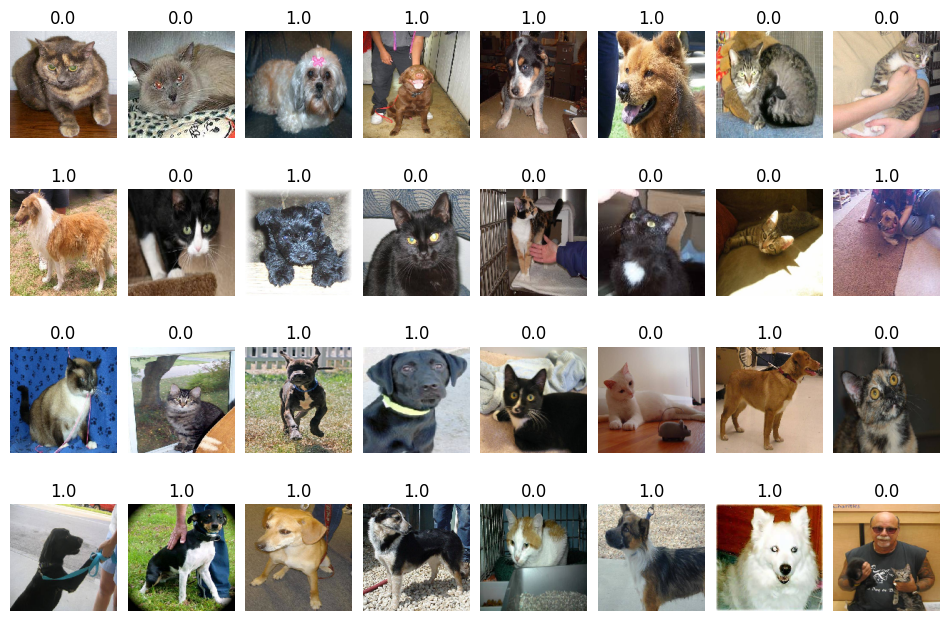

In [132]:
nrows = 4
ncols = 8

plt.figure(figsize=(12, 8))

for row in range(nrows):
    for col in range(ncols):
        index = ncols * row + col
        plt.subplot(nrows, ncols, index + 1)
        plt.imshow(images[index])
        plt.title(labels[index]) #Chó là 1, mèo là 0
        plt.axis('off')
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Visualizing output through convolutional layers

In [134]:
outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.inputs, outputs = outputs) 
#Ta phải định nghĩa ra một model mới mà output của nó là output của từng convolutional layers trong mạng

In [135]:
cat_img_files = [os.path.join(TRAIN_CATS_PATH, file) for file in os.listdir(TRAIN_CATS_PATH)]
dog_img_files = [os.path.join(TRAIN_DOGS_PATH, file) for file in os.listdir(TRAIN_DOGS_PATH)]

In [139]:
import random

In [140]:
img_path = random.choice(cat_img_files + dog_img_files)

In [156]:
img = image.load_img(img_path, target_size=(150, 150))  # whenever we load an image using sklearn.image, this is a PIL image
x = image.img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x = np.expand_dims(x, axis = 0)                 # Numpy array with shape (1, 150, 150, 3)
x /= 255.0

In [157]:
feature_maps = visualization_model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


In [158]:
layer_names = [layer.name for layer in model.layers]

In [161]:
for feature_map in feature_maps:
    print(feature_map.shape) # giống hệt đầu ra trong model.summary()

(1, 148, 148, 16)
(1, 74, 74, 16)
(1, 72, 72, 32)
(1, 36, 36, 32)
(1, 34, 34, 64)
(1, 17, 17, 64)
(1, 15, 15, 128)
(1, 7, 7, 128)
(1, 6272)
(1, 256)
(1, 1)


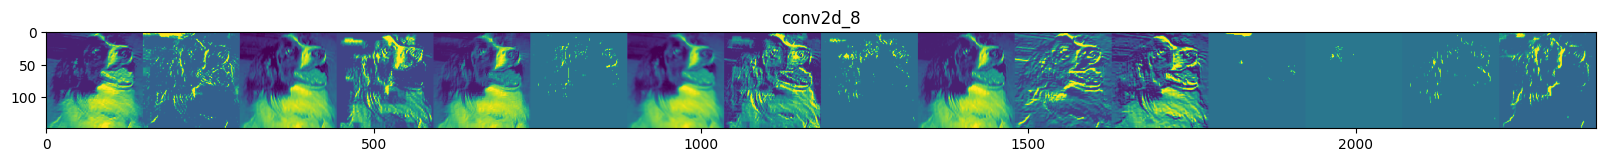

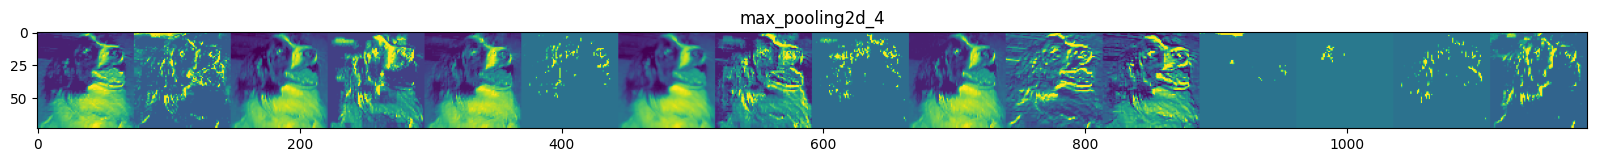

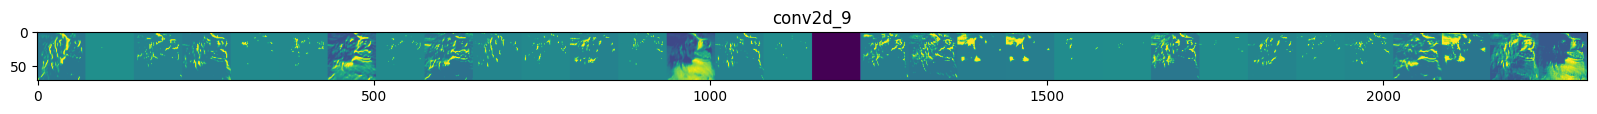

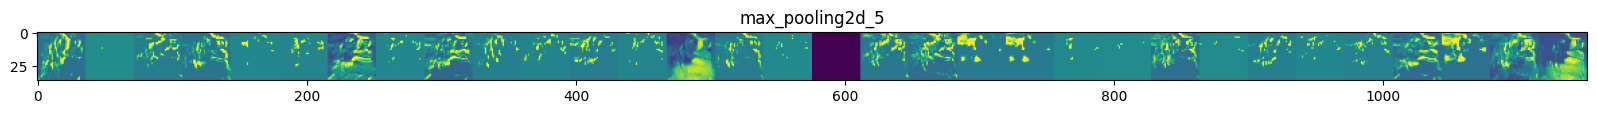

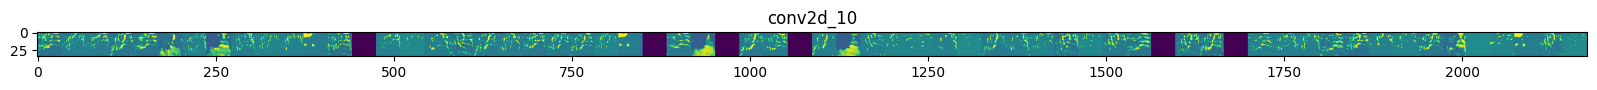

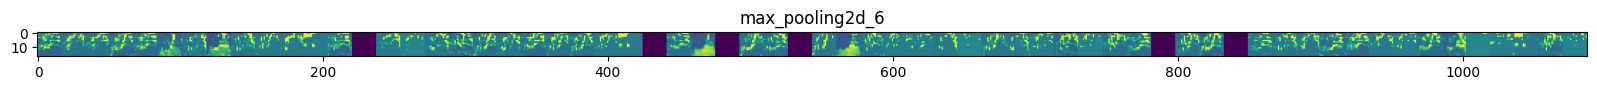

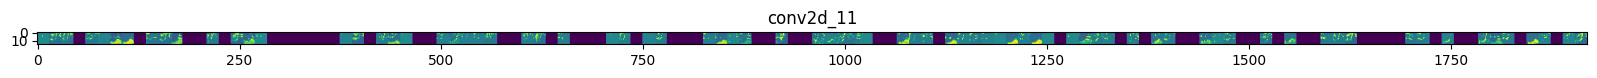

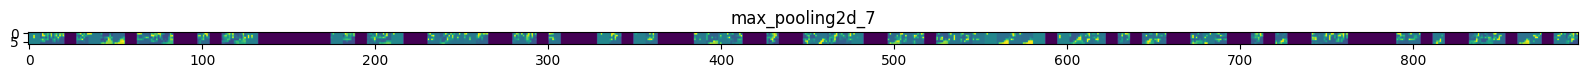

In [257]:
for layer_name, feature_map in zip(layer_names, feature_maps):
  
  if len(feature_map.shape) == 4: #ta chỉ muốn in ra output của các lớp tích chập ,maxpooling nên shape của nó phải = 4 ta mới quan tâm
    n_features = feature_map.shape[-1]  #số feature map, nghĩa là số lớp kernel dùng ở layer đó
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features) 
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

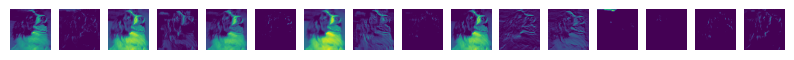

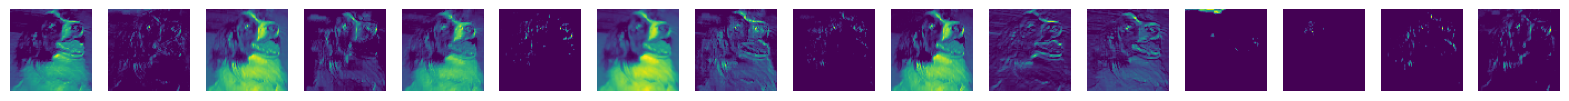

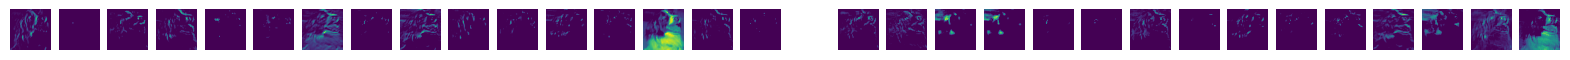

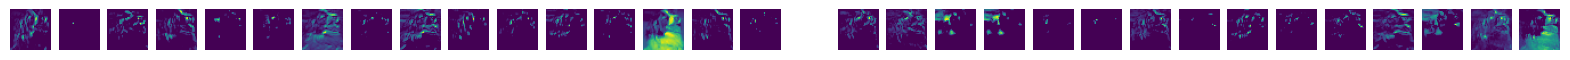

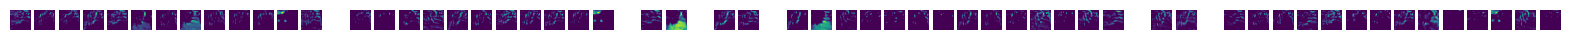

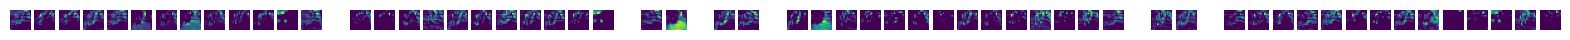

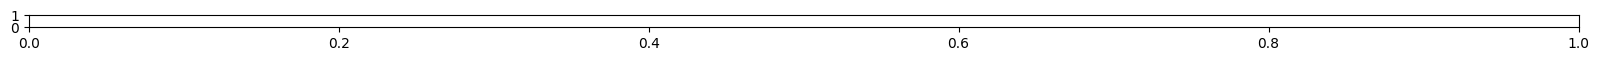

In [263]:
plt.figure(figsize = (10, 10))

for layer_name, feature_map in zip(layer_names, feature_maps):
  
  if len(feature_map.shape) == 4: #ta chỉ muốn in ra output của các lớp tích chập ,maxpooling nên shape của nó phải = 4 ta mới quan tâm
    n_features = feature_map.shape[-1]  #số feature map, nghĩa là số lớp kernel dùng ở layer đó
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features) 
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
        x = feature_map[0, :, :, i]
        plt.subplot(1, n_features, i + 1)
        plt.imshow(x) # Tile each filter into a horizontal grid
        plt.axis('off')
    
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.grid(False)

### Shape of feature maps, slicing index

In [210]:
feature_maps[0].shape # output của lớp tích chập đầu tiên của mạng

(1, 148, 148, 16)

In [208]:
feature_maps[0][0, :, :, :].shape

(148, 148, 16)

In [209]:
feature_maps[0][0, :, :, 0].shape

(148, 148)

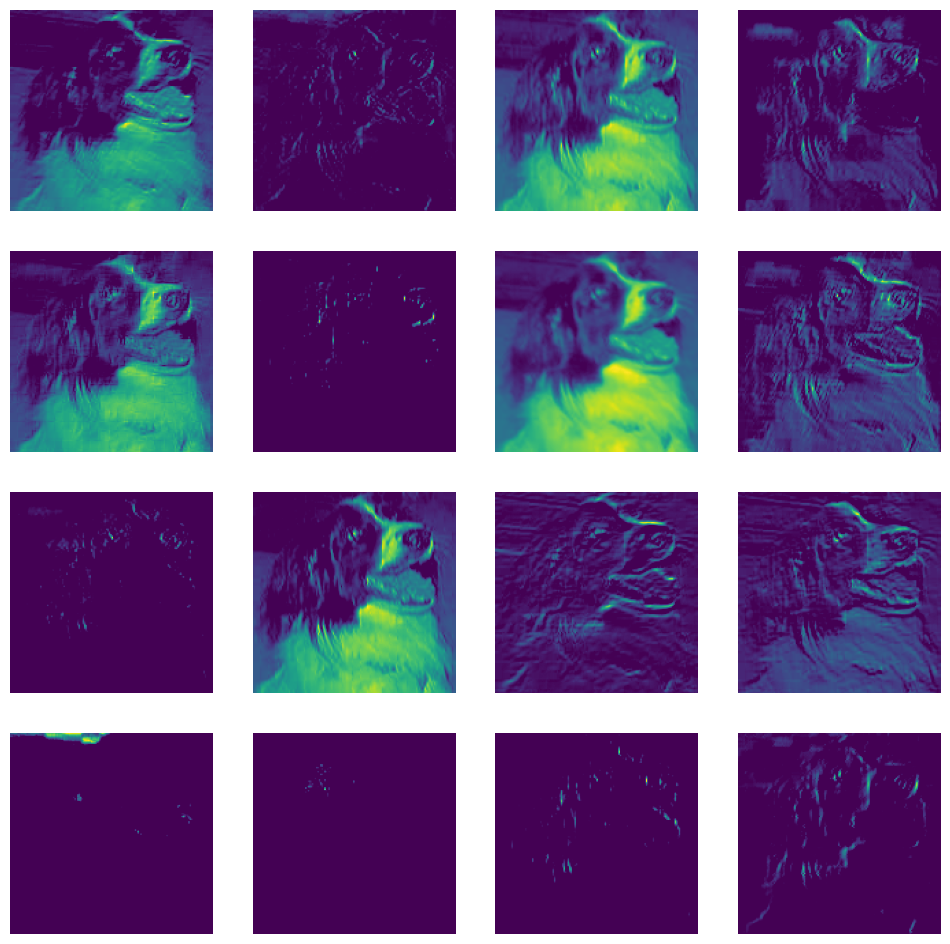

In [234]:
plt.figure(figsize = (12, 12))

for i in range(feature_maps[0][0, :, :, :].shape[-1]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(feature_maps[0][0, :, :, i], aspect='auto', cmap='viridis')
    plt.axis('off')

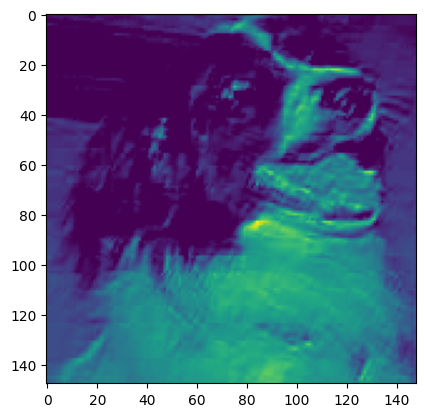

In [249]:
plt.imshow(feature_maps[0][0, :, :, 0])